Model Training

1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings

import pickle

 Import the CSV Data as Pandas DataFrame

In [2]:
df= pd.read_csv(r'C:\MLProject\Notebook\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df=df.drop_duplicates()

In [5]:
df.shape

(1337, 7)

Preparing X and Y variables

In [6]:
X = df.drop(columns=['expenses'],axis=1)

In [7]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [8]:
print("Categories in 'sex' variable:   ",end=" ")
print(df['sex'].unique())

print("Categories in 'smoker' variable:   ",end=" ")
print(df['smoker'].unique())


print("Categories in 'region' variable:   ",end=" ")
print(df['region'].unique())


Categories in 'sex' variable:    ['female' 'male']
Categories in 'smoker' variable:    ['yes' 'no']
Categories in 'region' variable:    ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
y = df['expenses']

In [10]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [13]:
# Create Column Transformer with 3 types of transformers
numeric_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,categorical_features),
        ("StandardScaler", numeric_transformer, numeric_features),
    ]
)


In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(1337, 11)

In [16]:
# Seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1069, 11), (268, 11))

Create an Evaluate Function to give all metrics after Model Training

In [17]:
def evaluate_model(true, predicted) :
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
    
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6096.1049
- Mean Absolute Error: 4181.5680
- R2 Score: 0.7286
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5911.5080
- Mean Absolute Error: 4163.5624
- R2 Score: 0.8098


Lasso
Model performance for Training set
- Root Mean Squared Error: 6080.7860
- Mean Absolute Error: 4181.9066
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.8970
- Mean Absolute Error: 4178.0744
- R2 Score: 0.8068


Ridge
Model performance for Training set
- Root Mean Squared Error: 6080.8463
- Mean Absolute Error: 4185.8128
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5964.5666
- Mean Absolute Error: 4185.6241
- R2 Score: 0.8064


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4828.7857
- Mean Absolute Error: 2910.0109


In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.881188
6,XGBRegressor,0.862727
7,AdaBoost Regressor,0.861770
0,Linear Regression,0.809824
1,Lasso,0.806828
2,Ridge,0.806395
3,K-Neighbors Regressor,0.782675
4,Decision Tree,0.781538


In [20]:
random_forest_reg = RandomForestRegressor( n_estimators=100)

random_forest_reg = random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred = random_forest_reg.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.31


Plot y_pred and y_test

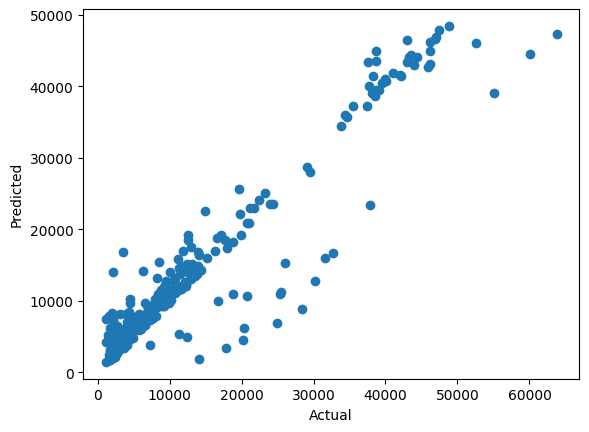

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

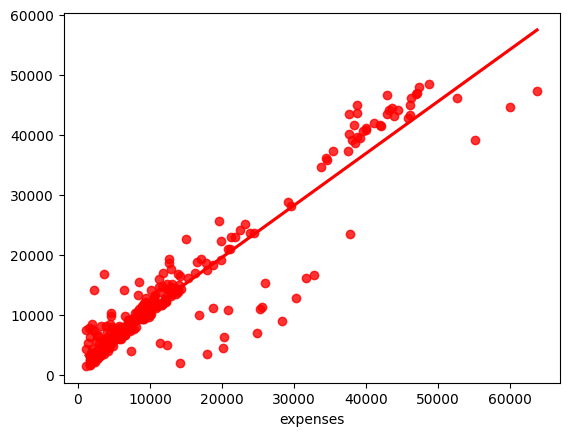

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
900,8688.86,10031.8658,-1343.0058
1064,5708.87,7063.8300,-1354.9600
1256,11436.74,11993.5655,-556.8255
298,38746.36,43629.7268,-4883.3668
237,4463.21,6930.9381,-2467.7281
...,...,...,...
534,13831.12,14070.3420,-239.2220
542,13887.20,14087.2441,-200.0441
760,3925.76,8081.8782,-4156.1182
1284,47403.88,47893.2285,-489.3485


From the above observation we can say that the performance (R-sqaured) of Random Forest Regressor model is good as compared to other models. So we will save Random Forest Regressor model for further testing of the data using pickle library.

Pickling The Model file For Deployment

In [24]:
pickle.dump(random_forest_reg, open('random_forest_reg_model.pkl', 'wb'))

In [25]:
pickled_model=pickle.load(open('random_forest_reg_model.pkl','rb'))